# Week 10 data analysis demonstration

## Purpose
- Show another way to analyze/visualize the data collected in week 10
- Present some computational tools used in modern biology

### DataSource
- Alice Liu and Isabel Thomas (Tuesday group 3)

#### email me with any questions cwessel2@jhu.edu

In [1]:
# importing packages required

# clustering algorithm used and linear regression
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# plotting package
import matplotlib.pyplot as plt

# data manipulation (learn this and never use Excel again)
import pandas as pd

# fast math functions 
import numpy as np

# supress warnings, if having issues remove this part of the code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in data as a pandas dataframe

data = pd.read_csv("./Results threshold.csv")
data

,,Area,Mean,IntDen,RawIntDen
0,1,81.982,130.940,10734.671,1280985
1,2,50.364,130.683,6581.679,785402
2,3,68.792,127.878,8796.944,1049753
3,4,42.244,125.421,5298.247,632248
4,5,50.976,129.445,6598.531,787413
5,6,53.666,132.348,7102.556,847559
6,7,83.532,129.028,10777.937,1286148
7,8,42.922,128.963,5535.401,660548
8,9,45.378,130.845,5937.449,708525
9,10,58.861,133.246,7843.047,935923


Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

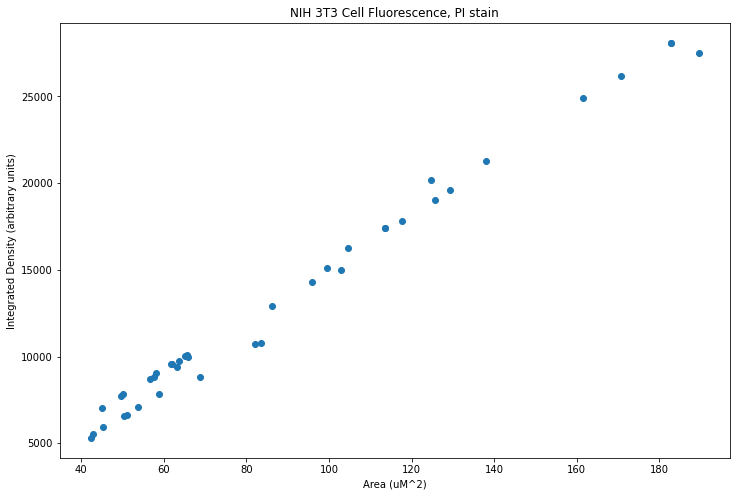

In [3]:
fig, ax = plt.subplots(figsize = [12, 8])

plt.scatter(x = 'Area', y = 'IntDen', data = data)
ax.set_xlabel('Area (uM^2)')
ax.set_ylabel('Integrated Density (arbitrary units)')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

#### From the plot we can see a very straight line
- This means that Area and Integrated Density are highly correlated

#### Let's look at a linear regression to quantify

In [4]:
# linear regression using sklearn 

# adjusting the data type so it plays nice with sklearn
x = np.array(data['Area']).reshape(-1, 1) 
y = np.array(data['IntDen']).reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(x, y)

LinearRegression()

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

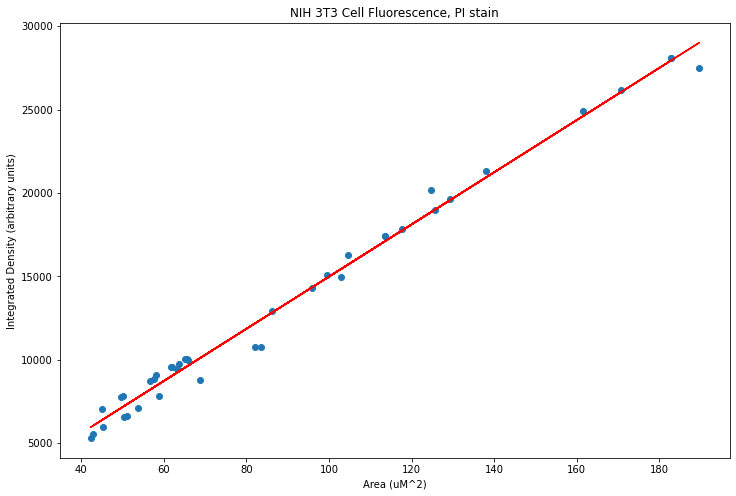

In [5]:
# let's overlay that line on our data

line = linear_model.predict(x)

fig, ax = plt.subplots(figsize = [12, 8])

plt.scatter(x = 'Area', y = 'IntDen', data = data)
plt.plot(x, line, color = 'r')
ax.set_xlabel('Area (uM^2)')
ax.set_ylabel('Integrated Density (arbitrary units)')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

In [6]:
# here we can see how well the model fit the data

linear_model.score(x, y)

0.9901317508075222

## Looks like a linear regression had an R^2 value of ~0.99. That's really high! 

So what that is telling us is that more cell Area is causing an increase in the total fluorescene that we are observing, right? Well, not quite. All we can say at this point is that Area and total fluorescence are highly *correlated*.

Particularly in polynomial regression models (like linear regression but with more dependent variables) it isn't useful to include analysis of both Area and total fluorescence if they both tell us nearly the exact same thing.

Question: Why would Area and fluorescence be so well correlated in the cells we are observing? 

## So let's look at the data another way

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

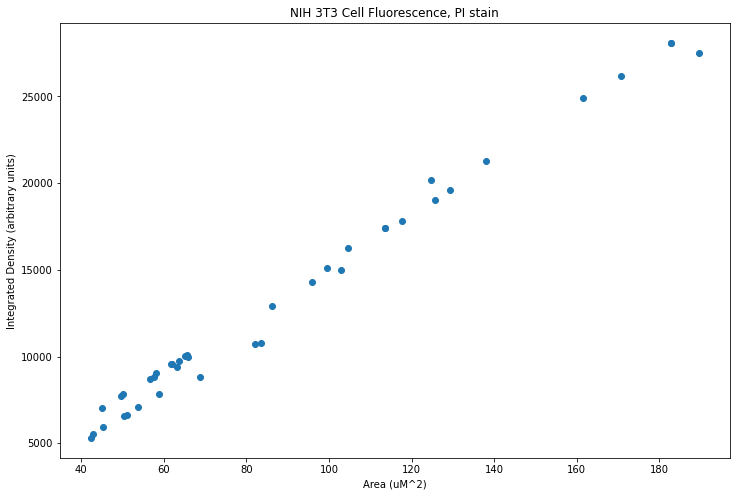

In [7]:
fig, ax = plt.subplots(figsize = [12, 8])

plt.scatter(x = 'Area', y = 'IntDen', data = data)
ax.set_xlabel('Area (uM^2)')
ax.set_ylabel('Integrated Density (arbitrary units)')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

## Do you see the two larger gaps in the line?

What could those be separating? Thinking about what we are looking at, living cells that we abruptly fixed in place, would it make sense that we see a group of cells with a low amount of DNA, another group of cells with a lot of DNA, and a group of cells in between? Sure! G1 has one copy of the DNA, S is slowly replicating the DNA, and when it's done G2 should have twice as much DNA as G1.

## Let's view this outside of the line

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

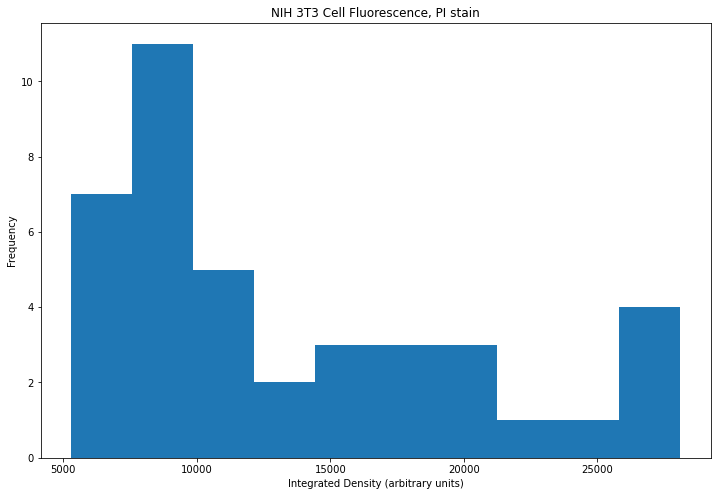

In [8]:
# We will drop the Area data from here on out because it's telling us the same thing as the integrated density data

fig, ax = plt.subplots(figsize = [12, 8])

plt.hist(x = 'IntDen', data = data)
ax.set_xlabel('Integrated Density (arbitrary units)')
ax.set_ylabel('Frequency')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

### Neat but is hard to see much going on, let's take a look after altering how many bins we group the data by

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain - 5 bins')

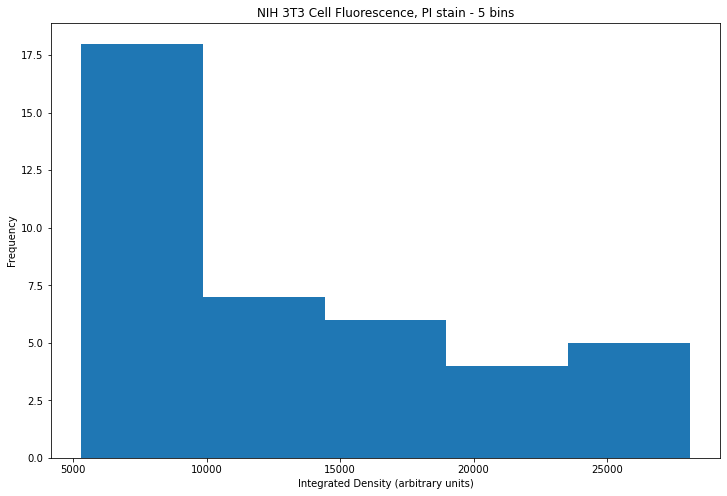

In [9]:
# Trying 5 bins...

fig, ax = plt.subplots(figsize = [12, 8])

plt.hist(x = 'IntDen', data = data, bins = 5)
ax.set_xlabel('Integrated Density (arbitrary units)')
ax.set_ylabel('Frequency')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain - 5 bins')

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain - 20 bins')

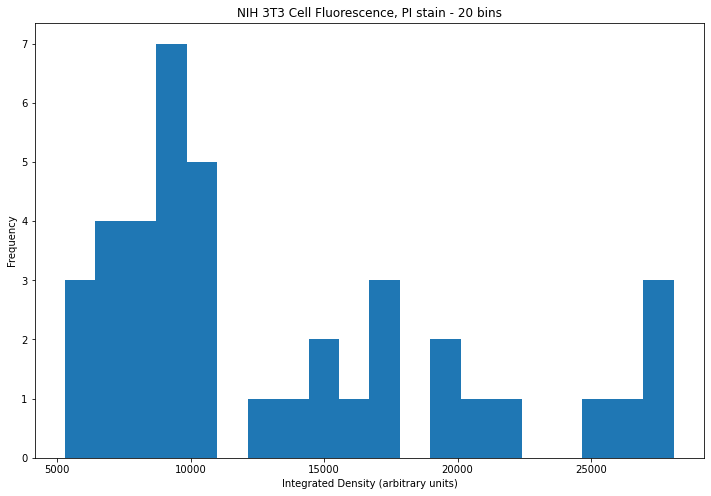

In [10]:
# Trying 20 bins...

fig, ax = plt.subplots(figsize = [12, 8])

plt.hist(x = 'IntDen', data = data, bins = 20)
ax.set_xlabel('Integrated Density (arbitrary units)')
ax.set_ylabel('Frequency')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain - 20 bins')

## Ok now we are seeing some separation into groups

## Let's color in the clusters

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

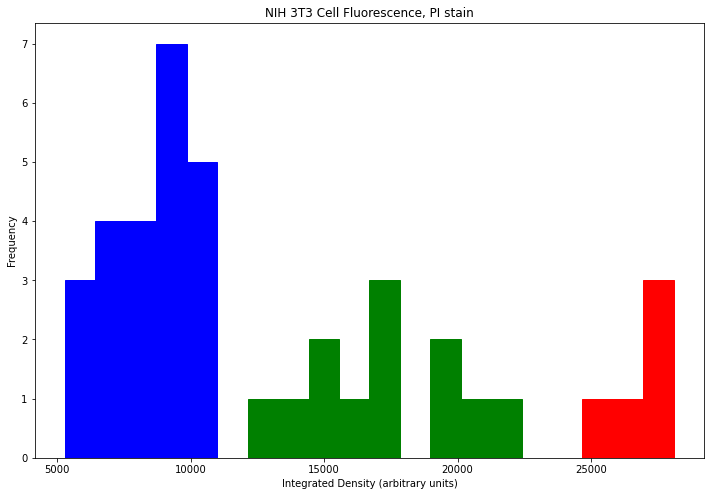

In [11]:
# Here we can assign each row a group based on an Area value (for convenience)

data['group'] = np.nan

data.loc[data['Area'] < 80, 'group'] = 'G1'
data.loc[data['Area'].between(80, 150), 'group'] = 'S'
data.loc[data['Area'] > 150, 'group'] = 'G2'

# plotting our histogram with colors
fig, ax = plt.subplots(figsize = [12, 8])

plt.hist(x = 'IntDen', data = data, bins=20)

# not pretty but works
for rect in ax.patches:
    if rect.get_x() < 11000:
        rect.set_color('b')
    if rect.get_x() > 11000 and rect.get_x() <24000:
        rect.set_color('g')
    if rect.get_x() > 24000:
        rect.set_color('r')

ax.set_xlabel('Integrated Density (arbitrary units)')
ax.set_ylabel('Frequency')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

## Does it work with the line?

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

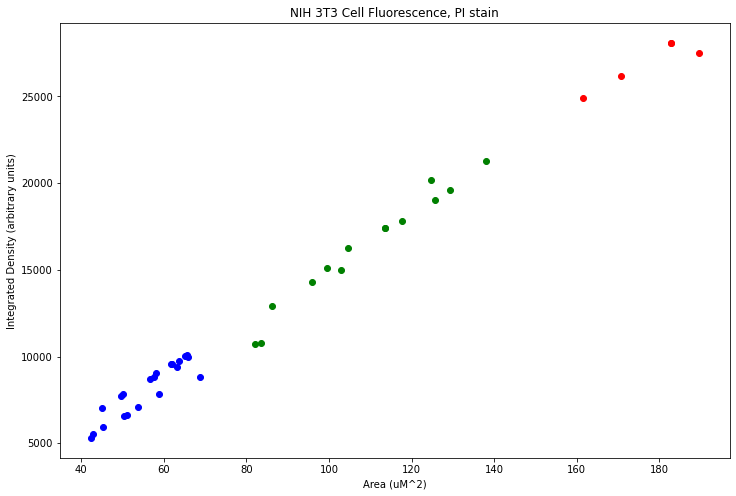

In [12]:
fig, ax = plt.subplots(figsize = [12, 8])

# labeling what we assume to be G1 cells in blue
plt.scatter(x = 'Area', y = 'IntDen', data = data.loc[data['Area'] < 80], color = 'b')

# labeling what we assume to be S cells in green
plt.scatter(x = 'Area', y = 'IntDen', data = data[data['Area'].between(80, 150)], color = 'g')

# labeling what we assume to be G2 cells in red
plt.scatter(x = 'Area', y = 'IntDen', data = data.loc[data['Area'] > 150], color = 'r')

ax.set_xlabel('Area (uM^2)')
ax.set_ylabel('Integrated Density (arbitrary units)')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

## Cool but we assigned colors based on intuition. Is there a less biased way we can group this data? 

For sure. K-means clustering is a cool and easy way to do this kind of analysis. All we do is say how many groups we expect and the algorithm does the rest. Note - useful if we have an idea of how many groups we expect, we could use a different algorithm that takes a guess how many groups there should be.

### Neat interactive tool to visualize and learn about the K-means method
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

## We know how many clusters we want but some good practice is making a 'scree plot' first
- Scree plot comes from the shape the line makes which looks like scree or the loose stones scattered around the base of a mountain
- We can infer the optimal number of clusters by where the plot levels out
- This is important to avoid over fitting. Adding more clusters stops adding significant value to our model, we start dividing things that probably shouldn't be divided!

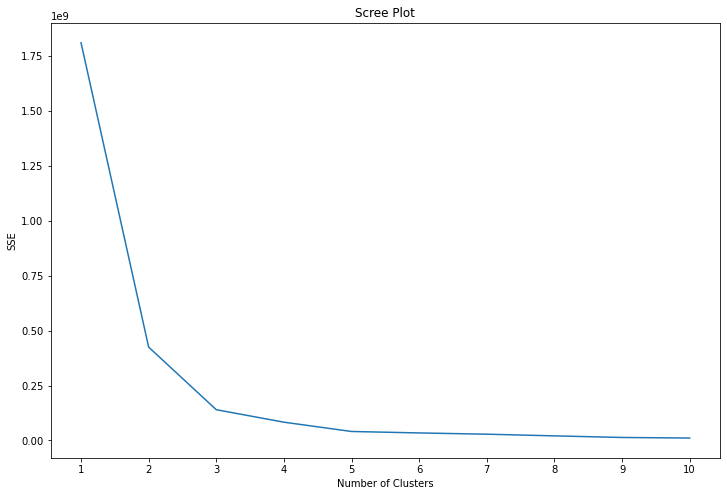

In [13]:
# need to adjust our data again to play nice with sklearn
data_adj = np.array(data['IntDen']).reshape(-1, 1)

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random", # choose random (but reproducible due to the seed) points to start our clustering
"n_init": 10, # how many times to run the algorithm (the final result is the one with the best score of the 10)
"random_state": 9483, # we give a seed value so our results are reproducible
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_adj)
    sse.append(kmeans.inertia_)

#visualize results
fig, ax = plt.subplots(figsize = [12, 8])
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE") # measure of how good our model is (lower is better)
plt.title("Scree Plot")
plt.show()

## Ok from this plot we could go with either 2 or 3 clusters. Since we have the knowledge of the kind of data we are dealing with and expect 3 clusters, let's go with that.

In [14]:
# Running the algorithm

kmeans = KMeans(init = "random", n_clusters = 3, n_init = 10, random_state = 9483)

# use our data to get a result
kmeans.fit(data_adj)

# list of which cluster each point falls into
cluster = kmeans.labels_

# adding this column to our dataframe
data['cluster'] = cluster
data

,,Area,Mean,IntDen,RawIntDen,group,cluster
0,1,81.982,130.940,10734.671,1280985,S,0
1,2,50.364,130.683,6581.679,785402,G1,0
2,3,68.792,127.878,8796.944,1049753,G1,0
3,4,42.244,125.421,5298.247,632248,G1,0
4,5,50.976,129.445,6598.531,787413,G1,0
5,6,53.666,132.348,7102.556,847559,G1,0
6,7,83.532,129.028,10777.937,1286148,S,0
7,8,42.922,128.963,5535.401,660548,G1,0
8,9,45.378,130.845,5937.449,708525,G1,0
9,10,58.861,133.246,7843.047,935923,G1,0


## Let's see how the algorithm did

Text(0.5, 1.0, 'NIH 3T3 Cell Fluorescence, PI stain')

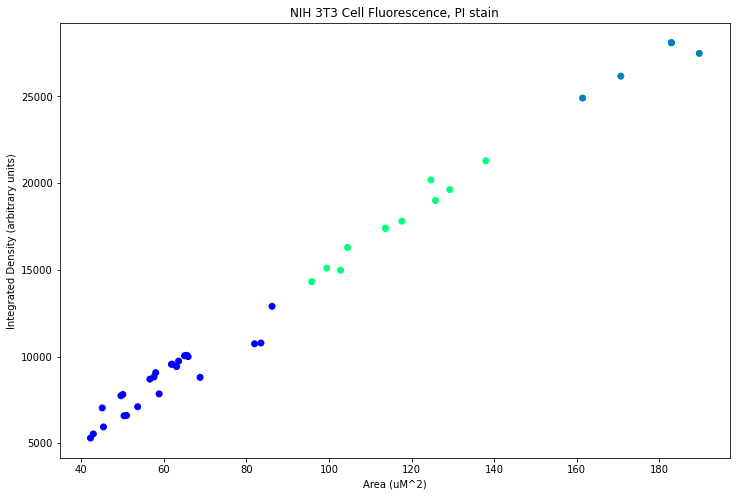

In [15]:
# using the line representation again because it's more straightforward than histogram coloring

fig, ax = plt.subplots(figsize = [12, 8])

plt.scatter(x = 'Area', y = 'IntDen', data = data, c = 'cluster', cmap = 'winter')
ax.set_xlabel('Area (uM^2)')
ax.set_ylabel('Integrated Density (arbitrary units)')
ax.set_title('NIH 3T3 Cell Fluorescence, PI stain')

## Hey not bad, very close to what we had thought!

## Let's finally look at a useful way to evaluate our clustering by making a contingency table

In [16]:
# Contingency table

pd.crosstab(data['group'], data['cluster'])

cluster,0,1,2
group,,,
G1,21,0,0
G2,0,5,0
S,3,0,11


### Here we read along the diagonal, cluster 0 shares 21 points with the G1 label we assigned manually. Looking down the 0 column we see that 3 points we assigned to S were included in cluster 0. Cluster 1 had no errors and captured all 5 points we thought were G2. Last cluster 2 got 11 points we thought were S.

### Overall really nice clustering!

## What you can do
- Try using this code as a guide to evaluate your own data, see how well this works for you!
- email me with any questions

## Caveats!
- This data set is useful because the clusters are easy to distinguish by eye. Yours might not be so straightforward.
- What we are assigning to G1, S, or G2 is our assumption and we have no real way of validating our assumption with this data.
- G2 in particular could encompass more than just G2 since any cell stage that has replicated DNA would fall under this catagory, including most parts of mitosis